In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
from mpl_toolkits.basemap import Basemap,addcyclic,shiftgrid

In [2]:
#导入数据
ds1 = xr.open_dataset('D:\Desktop\data310\data2021tempri.nc')
ds2 = xr.open_dataset('D:\Desktop\data310\data2019_200hpa_Geop.nc')
ds1

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 721, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-04-18 07:19:56 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
#赋值 t2m tp z
lat_ds1=ds1.latitude
lon_ds1=ds1.longitude
time_ds1=ds1.time
t2m_ds1=ds1.t2m
tp_ds1=ds1.tp
#200hpa Geop
lat_ds2=ds2.latitude
lon_ds2=ds2.longitude
time_ds2=ds2.time
z_ds2=ds2.z
print(z_ds2.values)

[[[109016.19  109016.19  109016.19  ... 109016.19  109016.19  109016.19 ]
  [109021.234 109021.234 109021.234 ... 109021.55  109021.55  109021.234]
  [109025.96  109025.96  109025.65  ... 109026.27  109026.27  109026.27 ]
  ...
  [108889.45  108889.14  108889.14  ... 108889.45  108889.45  108889.45 ]
  [108894.19  108894.19  108894.19  ... 108894.19  108894.19  108894.19 ]
  [108898.914 108898.914 108898.914 ... 108898.914 108898.914 108898.914]]

 [[108869.28  108869.28  108869.28  ... 108869.28  108869.28  108869.28 ]
  [108866.125 108866.44  108866.44  ... 108865.81  108865.81  108866.125]
  [108862.66  108862.98  108862.98  ... 108862.03  108862.03  108862.34 ]
  ...
  [108426.03  108426.03  108426.03  ... 108426.34  108426.34  108426.34 ]
  [108417.516 108417.516 108417.516 ... 108417.516 108417.516 108417.516]
  [108409.32  108409.32  108409.32  ... 108409.32  108409.32  108409.32 ]]

 [[107112.03  107112.03  107112.03  ... 107112.03  107112.03  107112.03 ]
  [107131.266 107131.2

In [5]:
#  annual mean温度平均值
t2m_annualmean_ds1 =t2m_ds1[:,:,:].mean(dim='time')
# DJF 2m 温度平均值
t2m_DJFmean_ds1 =t2m_ds1[11:14,:,:].mean(dim='time')
# JJA 2m 温度平均值
t2m_JJAmean_ds1 =t2m_ds1[5:8,:,:].mean(dim='time')
t2m_annualmean_ds1

<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)>
array([[259.80124, 259.80124, 259.80124, ..., 259.80124, 259.80124,
        259.80124],
       [259.92242, 259.92285, 259.92285, ..., 259.92172, 259.92184,
        259.92203],
       [260.0486 , 260.04916, 260.04932, ..., 260.04684, 260.0474 ,
        260.04807],
       ...,
       [226.92206, 226.92383, 226.92664, ..., 226.91681, 226.91972,
        226.92151],
       [226.7558 , 226.75758, 226.75911, ..., 226.75249, 226.7533 ,
        226.75456],
       [226.13951, 226.13951, 226.13951, ..., 226.13951, 226.13951,
        226.13951]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

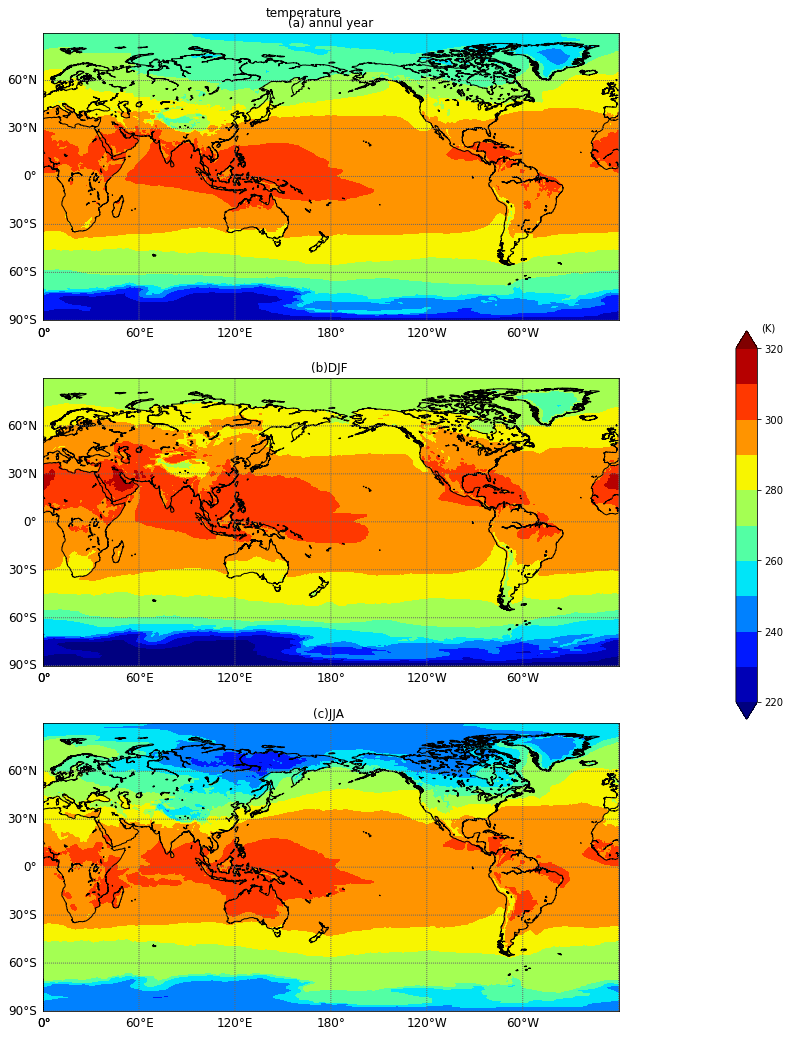

In [7]:
# 2021年温度，降雨图
#创建map,地图投影库，cyl投影方式，
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='l')
#创建画布，命名。
fig=plt.figure(figsize=(30,18))
fig.suptitle('temperature',fontsize=12,x=0.5,y=0.9)

# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(311)
ax1.set_title('(a) annul year')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)

# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x1,y1 = map(lons, lats)
clevs=np.linspace(220,320,11)
cs1=map.contourf(x1,y1,t2m_annualmean_ds1,clevs,cmap='jet',extend='both')

ax2=fig.add_subplot(312)
ax2.set_title('(b)DJF ')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)

# 创建填充等值线图
x1,y1 = map(lons, lats)
cs2=map.contourf(x1,y1,t2m_JJAmean_ds1,clevs,cmap='jet',extend='both')

#第三个图JJA平均温度图
ax3=fig.add_subplot(313)
ax3.set_title('(c)JJA ')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)

# 创建填充等值线图
x1,y1 = map(lons, lats)
cs3=map.contourf(x1,y1,t2m_DJFmean_ds1,clevs,cmap='jet',extend='both')

cb_ax = fig.add_axes([0.7, 0.35, 0.01, 0.3])
cbar = fig.colorbar(cs1,cax=cb_ax,orientation='vertical')
cbar.set_label('(K)', labelpad=-15, y=1.02, rotation=0)

# fig.savefig('D:\\Desktop\\data310\\t2m.pdf',dpi=300,bbox_inches='tight')

In [8]:
#  annual mean降雨平均值
tp_annual_ds1 =1000*tp_ds1[:,:,:].mean(dim='time')
# DJF 2m 温度平均值
tp_DJFmean_ds1 =1000*tp_ds1[11:14,:,:].mean(dim='time')
# JJA 2m 温度平均值
tp_JJAmean_ds1 =1000*tp_ds1[5:8,:,:].mean(dim='time')
tp_annual_ds1

<xarray.DataArray 'tp' (latitude: 721, longitude: 1440)>
array([[0.6769076 , 0.6769076 , 0.6769076 , ..., 0.6769076 , 0.6769076 ,
        0.6769076 ],
       [0.700448  , 0.700448  , 0.700448  , ..., 0.70060045, 0.70060045,
        0.70060015],
       [0.70363814, 0.7039414 , 0.7039414 , ..., 0.70394206, 0.70394206,
        0.70379025],
       ...,
       [0.14321692, 0.14321692, 0.14321692, ..., 0.14321692, 0.14321692,
        0.14321692],
       [0.14033106, 0.14033106, 0.14033106, ..., 0.14017926, 0.14033106,
        0.14033106],
       [0.1485326 , 0.1485326 , 0.1485326 , ..., 0.1485326 , 0.1485326 ,
        0.1485326 ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

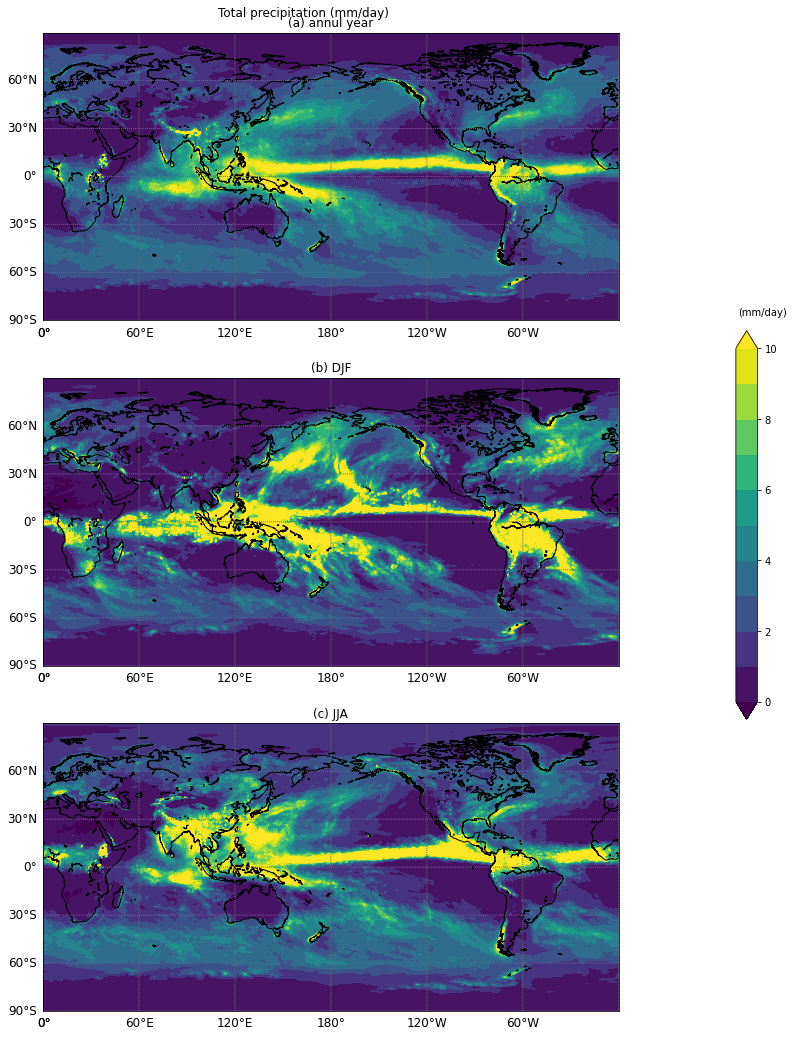

In [9]:
# 2021年降雨图
#创建map,地图投影库，cyl投影方式，
map = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,llcrnrlon=0,urcrnrlon=360,resolution='l')

#创建画布，命名。
fig=plt.figure(figsize=(30,18))
fig.suptitle('Total precipitation (mm/day)',fontsize=12,x=0.5,y=0.9)
# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(311)
ax1.set_title('(a) annul year')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x1,y1 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs1=map.contourf(x1,y1,tp_annual_ds1,clevs,cmap=plt.cm.viridis,extend='both')

ax2=fig.add_subplot(312)
ax2.set_title('(b) DJF')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
cs2=map.contourf(x1,y1,tp_DJFmean_ds1,clevs,cmap=plt.cm.viridis,extend='both')

ax3=fig.add_subplot(313)
ax3.set_title('(c) JJA')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
cs3=map.contourf(x1,y1,tp_JJAmean_ds1,clevs,cmap=plt.cm.viridis,extend='both')

cb_ax = fig.add_axes([0.7, 0.35, 0.01, 0.3])
cbar = fig.colorbar(cs1,cax=cb_ax,orientation='vertical')
cbar.set_label('(mm/day)', labelpad=-15, y=1.06, rotation=0)
# fig.savefig('D:\\Desktop\\data310\\total_precipitation.pdf',dpi=300,bbox_inches='tight')

In [10]:
#  annual mean 200hpa 位势高度平均值
z_annual_ds2 =z_ds2[:,:,:].mean(dim='time')/9.8
# DJF 位势高度平均值
z_DJFmean_ds2 =z_ds2[11:14,:,:].mean(dim='time')/9.8
# JJA 2m 温度平均值
z_JJAmean_ds2 =z_ds2[5:8,:,:].mean(dim='time')/9.8
z_DJFmean_ds2

<xarray.DataArray 'z' (latitude: 721, longitude: 1440)>
array([[11023.637 , 11023.637 , 11023.637 , ..., 11023.637 , 11023.637 ,
        11023.637 ],
       [11025.6   , 11025.6   , 11025.6   , ..., 11025.631 , 11025.631 ,
        11025.631 ],
       [11027.593 , 11027.562 , 11027.562 , ..., 11027.593 , 11027.593 ,
        11027.593 ],
       ...,
       [10940.4795, 10940.512 , 10940.544 , ..., 10940.447 , 10940.447 ,
        10940.447 ],
       [10939.289 , 10939.289 , 10939.289 , ..., 10939.225 , 10939.257 ,
        10939.257 ],
       [10937.97  , 10937.97  , 10937.97  , ..., 10937.97  , 10937.97  ,
        10937.97  ]], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0

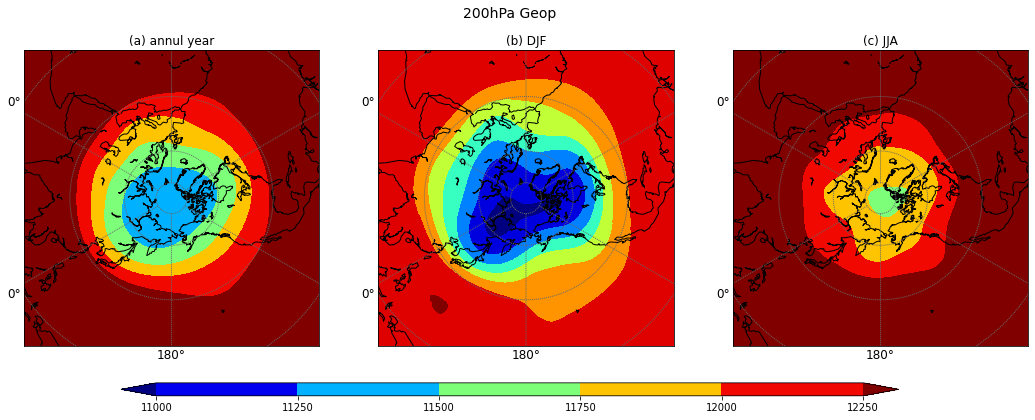

In [12]:
# 2021年200ha位势高度图
#创建map,地图投影库，cyl投影方式，
map = Basemap(projection='npstere',boundinglat=10,lon_0=180)

#创建画布，命名。
fig=plt.figure(figsize=(18,18))
fig.suptitle('200hPa Geop',fontsize=14,x=0.5,y=0.65)
# 在画布上绘制子图，划分为3行一列，选中图1，命名。
ax1=fig.add_subplot(131)
ax1.set_title('(a) annul year')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(11000,12000,11)
cs1=map.contourf(x3,y3,z_annual_ds2,cmap='jet',extend='both')


ax2=fig.add_subplot(132)
ax2.set_title('(b) DJF')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs2=map.contourf(x3,y3,z_DJFmean_ds2,cmap='jet',extend='both')

ax3=fig.add_subplot(133)
ax3.set_title('(c) JJA')
#填充大陆，绘制海岸线，绘制经纬线
map.fillcontinents(zorder=0)
map.drawcoastlines()
map.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='DimGray',fontsize=12)
map.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='DimGray',fontsize=12)
# 将经纬度转化为二维数组，生成网格点坐标矩阵
lons, lats = np.meshgrid(lon_ds1.values, lat_ds1.values)
# 创建填充等值线图
x3,y3 = map(lons, lats)
clevs=np.linspace(0,10,11)
cs3=map.contourf(x3,y3,z_JJAmean_ds2,cmap='jet',extend='both')
cb_ax = fig.add_axes([0.2, 0.35, 0.6, 0.01])
cbar = fig.colorbar(cs1, cax=cb_ax, orientation='horizontal')
fig.savefig('D:\\Desktop\\data310\\z.pdf',dpi=300,bbox_inches='tight')